<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#FPL-ML-006:-The-Home-Adantage" data-toc-modified-id="FPL-ML-006:-The-Home-Adantage-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>FPL-ML-006: The Home Adantage</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Read-in-the-data" data-toc-modified-id="Read-in-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read in the data</a></span></li><li><span><a href="#Filter-players" data-toc-modified-id="Filter-players-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Filter players</a></span></li><li><span><a href="#Setup-paired-dataframe" data-toc-modified-id="Setup-paired-dataframe-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Setup paired dataframe</a></span></li><li><span><a href="#Home-vs.-Away-points" data-toc-modified-id="Home-vs.-Away-points-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Home vs. Away points</a></span><ul class="toc-item"><li><span><a href="#All-players" data-toc-modified-id="All-players-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>All players</a></span></li><li><span><a href="#Split-by-Position" data-toc-modified-id="Split-by-Position-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Split by Position</a></span><ul class="toc-item"><li><span><a href="#Goalkeepers" data-toc-modified-id="Goalkeepers-1.5.2.1"><span class="toc-item-num">1.5.2.1&nbsp;&nbsp;</span>Goalkeepers</a></span></li><li><span><a href="#Defenders" data-toc-modified-id="Defenders-1.5.2.2"><span class="toc-item-num">1.5.2.2&nbsp;&nbsp;</span>Defenders</a></span></li><li><span><a href="#Midfielders" data-toc-modified-id="Midfielders-1.5.2.3"><span class="toc-item-num">1.5.2.3&nbsp;&nbsp;</span>Midfielders</a></span></li><li><span><a href="#Forwards" data-toc-modified-id="Forwards-1.5.2.4"><span class="toc-item-num">1.5.2.4&nbsp;&nbsp;</span>Forwards</a></span></li></ul></li></ul></li></ul></li></ul></div>

# FPL-ML-006: The Home Adantage

This will invesetigate whether the home advantage is reflected in FPL points, and it will check if this is reflected across all the different positions.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Read in the data

In [2]:
player_performance = pd.read_csv('../../data/csv/player_performance_01.csv')
player_performance.head()

,kickoff_time,team_h_score,team_a_score,was_home,round,total_points,value,transfers_balance,selected,transfers_in,...,tackled,offside,target_missed,fouls,dribbles,id,fixture,opponent_team,team,position
0,2018-08-12 15:00:00+00:00,0,2,True,1,3,50,0,70767,0,...,0,0,0,0,0,0,0,12,0,0
1,2018-08-18 16:30:00+00:00,3,2,False,2,3,50,188,90038,6059,...,0,0,0,0,0,0,13,5,0,0
2,2018-08-25 14:00:00+00:00,3,1,True,3,3,50,8540,107301,19550,...,0,0,0,0,0,0,20,18,0,0
3,2018-09-02 12:30:00+00:00,2,3,False,4,1,50,9582,123566,19332,...,0,0,0,0,0,0,32,4,0,0
4,2018-09-15 14:00:00+00:00,1,2,False,5,2,50,-3297,123310,8837,...,0,0,0,0,0,0,45,14,0,0


## Filter players

In [3]:
minimum_mins = 90
vp = player_performance.loc[player_performance['minutes']>=minimum_mins,:]

We will only consider players who have played more than {{minimum_mins}} minutes.

Next, we will only consider players who played in both home and away matches against the same team.

## Setup paired dataframe

In [4]:
# get all unqiue player ids
valid_ids = np.unique(vp['id'])

# empty array to store points
points_store = np.zeros((len(valid_ids) * 20, 4), dtype='int')

# row count
count = -1

# boolean arrays for different players
player_bool = pd.DataFrame()
for i in valid_ids:
    player_bool[i] = vp['id']==i
    
# boolean arrays for different teams
team_bool = pd.DataFrame()
for i in range(20):
    team_bool[i] = vp['opponent_team']==i
    
pos_ind = vp.columns.get_loc('position')
tp_ind = vp.columns.get_loc('total_points')
wh_ind = vp.columns.get_loc('was_home')
id_ind = vp.columns.get_loc('id')
    
# loop through players and teams
for i in valid_ids:
    for j in range(20):
        b = np.where(np.logical_and(player_bool[i], team_bool[j]))[0]
        if len(b)==2:
            count = count + 1
            points_store[count,2] = vp.iloc[b[0], id_ind]
            points_store[count,3] = vp.iloc[b[0], pos_ind]
            if vp.iloc[b[0], wh_ind]:
                points_store[count,0] = vp.iloc[b[0],tp_ind]
                points_store[count,1] = vp.iloc[b[1],tp_ind]
            else:
                points_store[count,0] = vp.iloc[b[1],tp_ind]
                points_store[count,1] = vp.iloc[b[0],tp_ind]

points_store = points_store[1:count,:]
points_store_df = pd.DataFrame(points_store, columns=['home', 'away', 'id', 'position'])
points_store_df.head()

,home,away,id,position
0,3,2,1,0
1,2,3,1,0
2,2,1,1,0
3,3,3,1,0
4,7,3,1,0


## Home vs. Away points

In [5]:
def histOutline(dataIn, *args, **kwargs):
    (histIn, binsIn) = np.histogram(dataIn, *args, **kwargs)

    stepSize = binsIn[1] - binsIn[0]

    bins = np.zeros(len(binsIn)*2 + 2, dtype=np.float)
    data = np.zeros(len(binsIn)*2 + 2, dtype=np.float)
    for bb in range(len(binsIn)):
        bins[2*bb + 1] = binsIn[bb]
        bins[2*bb + 2] = binsIn[bb] + stepSize
        if bb < len(histIn):
            data[2*bb + 1] = histIn[bb]
            data[2*bb + 2] = histIn[bb]

    bins[0] = bins[1]
    bins[-1] = bins[-2]
    data[0] = 0
    data[-1] = 0

    return (bins, data)

### All players

Text(0.5, 0.98, 'Home and Away Points')

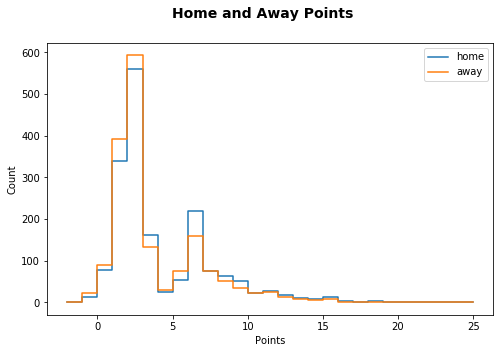

In [46]:
plt.figure(figsize=(8,5))
bins = np.array(range(-2,25))
hpoints_x, hpoints_y = histOutline(points_store[:,0], bins=bins)
apoints_x, apoints_y = histOutline(points_store[:,1], bins=bins)
plt.plot(hpoints_x, hpoints_y);
plt.plot(apoints_x, apoints_y);
plt.legend(['home', 'away']);
plt.xlabel('Points');
plt.ylabel('Count');
plt.suptitle('Home and Away Points', fontsize=14, fontweight='bold');

plt.savefig('../../figures/home_away_points.svg', forma)

In [7]:
points_normal_test = scipy.stats.shapiro(points_store[:,0:2])
print(points_normal_test)

points_test = scipy.stats.wilcoxon(points_store[:,0], points_store[:,1])

(0.8219552636146545, 0.0)


The Wilcoxon signed-rank test is used to test for differences between two paired non-normal datasets. A p-value of {{points_test[1]}} is found between home and away points from a player in the reverse fixtures, meaning this results is significantly different.

Now we need to check if this difference comes from a particular position, or is consistent across all positions.

### Split by Position

#### Goalkeepers

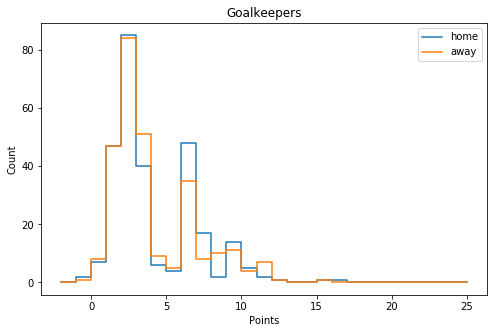

In [8]:
gkp_ind = points_store[:, 3] == 0
plt.figure(figsize=(8, 5))
bins = np.array(range(-2, 25))
gkp_hpoints_x, gkp_hpoints_y = histOutline(points_store[gkp_ind, 0], bins=bins)
gkp_apoints_x, gkp_apoints_y = histOutline(points_store[gkp_ind, 1], bins=bins)
plt.plot(gkp_hpoints_x, gkp_hpoints_y)
plt.plot(gkp_apoints_x, gkp_apoints_y)
plt.legend(['home', 'away']);
plt.xlabel('Points');
plt.ylabel('Count');
plt.title('Goalkeepers');

In [9]:
gkp_points_normal_test = scipy.stats.shapiro(points_store[gkp_ind,0:2])
print(gkp_points_normal_test)

gkp_points_test = scipy.stats.wilcoxon(points_store[gkp_ind, 0],
                                       points_store[gkp_ind, 1])
print(gkp_points_test[1])

(0.8608756065368652, 6.038342236119221e-22)
0.5894235565837486


#### Defenders

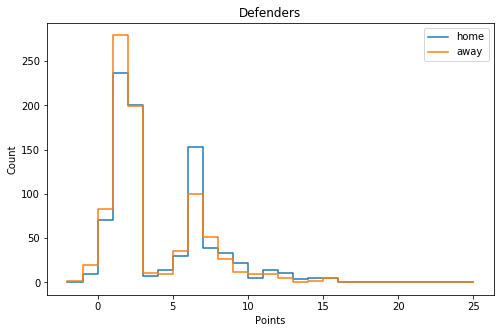

In [10]:
def_ind = points_store[:, 3] == 1
plt.figure(figsize=(8, 5))
bins = np.array(range(-2, 25))
def_hpoints_x, def_hpoints_y = histOutline(points_store[def_ind, 0], bins=bins)
def_apoints_x, def_apoints_y = histOutline(points_store[def_ind, 1], bins=bins)
plt.plot(def_hpoints_x, def_hpoints_y)
plt.plot(def_apoints_x, def_apoints_y)
plt.legend(['home', 'away']);
plt.xlabel('Points');
plt.ylabel('Count');
plt.title('Defenders');

In [11]:
def_points_test = scipy.stats.wilcoxon(points_store[def_ind,0], points_store[def_ind,1]);
print(def_points_test[1])

4.3331178202790505e-05


#### Midfielders

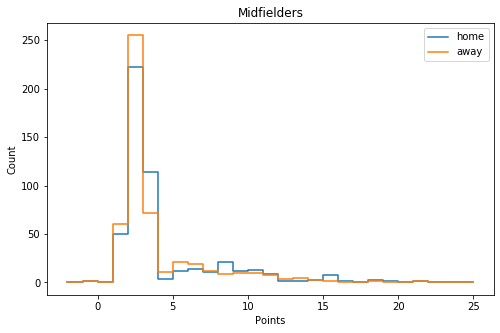

In [12]:
mid_ind = points_store[:, 3] == 2
plt.figure(figsize=(8, 5))
bins = np.array(range(-2, 25))
mid_hpoints_x, mid_hpoints_y = histOutline(points_store[mid_ind, 0], bins=bins)
mid_apoints_x, mid_apoints_y = histOutline(points_store[mid_ind, 1], bins=bins)
plt.plot(mid_hpoints_x, mid_hpoints_y)
plt.plot(mid_apoints_x, mid_apoints_y)
plt.legend(['home', 'away']);
plt.xlabel('Points');
plt.ylabel('Count');
plt.title('Midfielders');

In [13]:
mid_points_test = scipy.stats.wilcoxon(points_store[mid_ind, 0],
                                       points_store[mid_ind, 1])
print(mid_points_test[1])

0.03077211227250524


#### Forwards

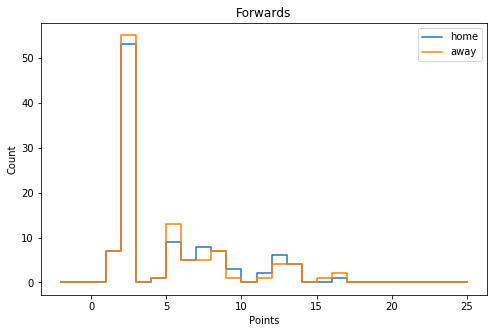

In [42]:
fwd_ind = points_store[:, 3] == 3
plt.figure(figsize=(8, 5))
bins = np.array(range(-2, 25))
fwd_hpoints_x, fwd_hpoints_y = histOutline(points_store[fwd_ind, 0], bins=bins)
fwd_apoints_x, fwd_apoints_y = histOutline(points_store[fwd_ind, 1], bins=bins)
plt.plot(fwd_hpoints_x, fwd_hpoints_y)
plt.plot(fwd_apoints_x, fwd_apoints_y)
plt.legend(['home', 'away']);
plt.xlabel('Points');
plt.ylabel('Count');
plt.title('Forwards');

plt.savefig('../../figures/home_away_points.svg', format='svg')

In [15]:
fwd_points_test = scipy.stats.wilcoxon(points_store[fwd_ind, 0],
                                       points_store[fwd_ind, 1])
print(fwd_points_test[1])

0.4229862257944381


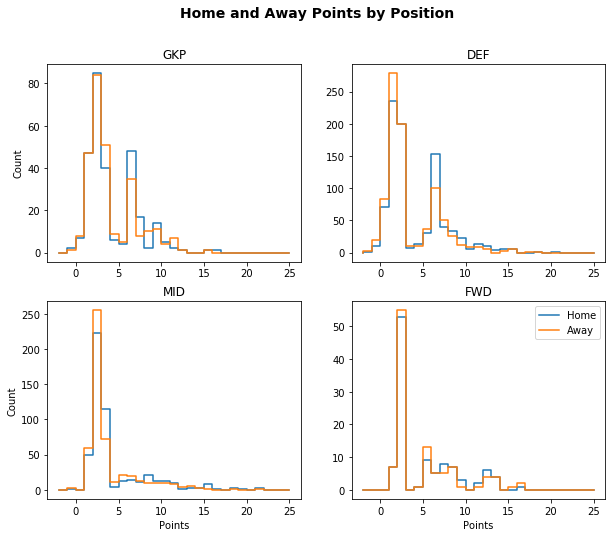

In [44]:
fig, ax = plt.subplots(2,2, figsize=(10,8))
# GKP
ax[0,0].plot(gkp_hpoints_x, gkp_hpoints_y);
ax[0,0].plot(gkp_apoints_x, gkp_apoints_y);
ax[0,0].set_ylabel('Count');
ax[0,0].set_title('GKP')
# DEF
ax[0,1].plot(def_hpoints_x, def_hpoints_y);
ax[0,1].plot(def_apoints_x, def_apoints_y);
ax[0,1].set_title('DEF');
# MID
ax[1,0].plot(mid_hpoints_x, mid_hpoints_y);
ax[1,0].plot(mid_apoints_x, mid_apoints_y);
ax[1,0].set_ylabel('Count');
ax[1,0].set_xlabel('Points')
ax[1,0].set_title('MID');
# FWD
ax[1,1].plot(fwd_hpoints_x, fwd_hpoints_y);
ax[1,1].plot(fwd_apoints_x, fwd_apoints_y);
ax[1,1].set_xlabel('Points')
ax[1,1].set_title('FWD');
ax[1,1].legend(['Home', 'Away']);

plt.suptitle('Home and Away Points by Position', fontsize=14, fontweight='bold')
plt.savefig('../../figures/home_away_points_position.svg', format='svg')

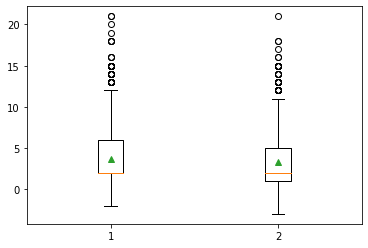

In [17]:
plt.boxplot([points_store[:,0], points_store[:,1]], showmeans=True);

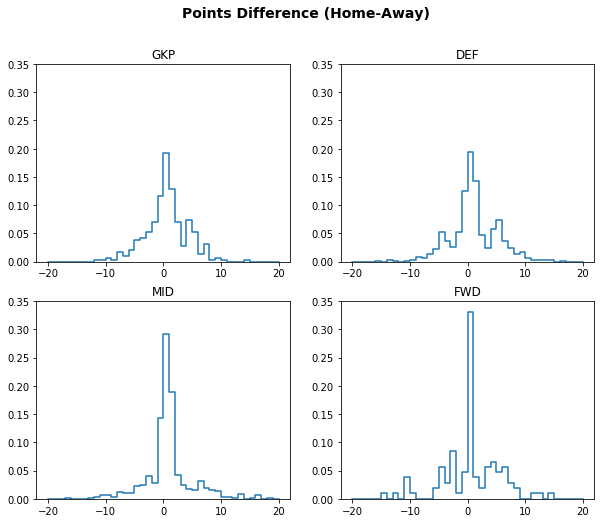

In [37]:
diff = points_store[:,0]-points_store[:,1]
diff_bins = np.array(range(-20,20))
fig, ax = plt.subplots(2,2, figsize=(10,8))
fig.suptitle("Points Difference (Home-Away)", fontsize=14, fontweight='bold');
ylim = 0.35
# GKP
gkp_diff_x, gkp_diff_y = histOutline(diff[gkp_ind], diff_bins)
ax[0,0].plot(gkp_diff_x, gkp_diff_y/sum(gkp_ind));
ax[0,0].set_ylim(0,ylim);
ax[0,0].set_title('GKP');
# DEF
def_diff_x, def_diff_y = histOutline(diff[def_ind], diff_bins)
ax[0,1].plot(def_diff_x, def_diff_y/sum(def_ind));
ax[0,1].set_ylim(0,ylim);
ax[0,1].set_title('DEF');
# MID
mid_diff_x, mid_diff_y = histOutline(diff[mid_ind], diff_bins)
ax[1,0].plot(mid_diff_x, mid_diff_y/sum(mid_ind));
ax[1,0].set_ylim(0,ylim);
ax[1,0].set_title('MID');
# FWD
fwd_diff_x, fwd_diff_y = histOutline(diff[fwd_ind], diff_bins)
ax[1,1].plot(fwd_diff_x, fwd_diff_y/sum(fwd_ind));
ax[1,1].set_ylim(0,ylim);
ax[1,1].set_title('FWD');


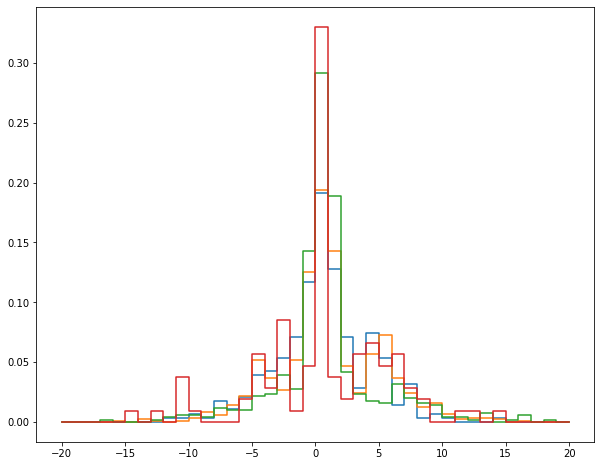

In [24]:
plt.figure(figsize=(10,8));
plt.plot(gkp_diff_x, gkp_diff_y/sum(gkp_ind));
plt.plot(def_diff_x, def_diff_y/sum(def_ind)); 
plt.plot(mid_diff_x, mid_diff_y/sum(mid_ind));
plt.plot(fwd_diff_x, fwd_diff_y/sum(fwd_ind));